# Study Case

The objective of the assignment is to use the following data set to **provide advice to a client of your choosing**. The data set is Crash Stats - Data Extract - Datasets - Victorian Government Data Directory. This is public data was collected on the web and is not related to any work we currently undertake.

**We would like you to investigate, analyse it and prepare a presentation.** You may also supplement the analysis with additional data as you see fit, but the core analysis should be focused on the crashes.

# Data Exploration

In [1]:
# Standard imports

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

## Datasets Preview

In [ ]:
# Datasets
data_path = 'data/ACCIDENT/'

# Accidents dataframes
df_ACCIDENT = pd.read_csv(data_path + 'ACCIDENT.csv')
df_ACCIDENT_CHAINAGE = pd.read_csv(data_path + 'ACCIDENT_CHAINAGE.csv')
df_ACCIDENT_EVENT = pd.read_csv(data_path + 'ACCIDENT_EVENT.csv')
df_ACCIDENT_LOCATION = pd.read_csv(data_path + 'ACCIDENT_LOCATION.csv')

# Conditions
df_WEATHER = pd.read_csv(data_path + 'ATMOSPHERIC_COND.csv')
df_ROAD_COND = pd.read_csv(data_path + 'ROAD_SURFACE_COND.csv')

# Nodes
df_NODE = pd.read_csv(data_path + 'NODE.csv')
df_NODE_ID_COMPLEX_INT_ID = pd.read_csv(data_path + 'NODE_ID_COMPLEX_INT_ID.csv')

# Person and vehicles
df_PERSON = pd.read_csv(data_path + 'PERSON.csv')
df_VEHICLE = pd.read_csv(data_path + 'VEHICLE.csv')

# Type of accident
df_SUBDCA = pd.read_csv(data_path + 'SUBDCA.csv')

# Create a dictionnary with all the dataframes
dict_df = {
    'ACCIDENT': df_ACCIDENT,
    'ACCIDENT_CHAINAGE': df_ACCIDENT_CHAINAGE,
    'ACCIDENT_EVENT': df_ACCIDENT_EVENT,
    'ACCIDENT_LOCATION': df_ACCIDENT_LOCATION,
    'WEATHER': df_WEATHER,
    'ROAD_COND': df_ROAD_COND,
    'NODE': df_NODE,
    'NODE_ID_COMPLEX_INT_ID': df_NODE_ID_COMPLEX_INT_ID,
    'PERSON': df_PERSON,
    'VEHICLE': df_VEHICLE,
    'SUBDCA': df_SUBDCA,
}

Display datasets head

In [13]:
for df_name, df in dict_df.items():
    print(f'-------------\n{df_name} dataframe:')
    display(df.head())

-------------
ACCIDENT dataframe:


,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,...,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE
0,T20060000010,13/01/2006,12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,...,6,0,1,0,5,1,1,Cross intersection,3,60
1,T20060000018,13/01/2006,19:10:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,...,4,0,1,0,3,1,2,T intersection,3,70
2,T20060000022,14/01/2006,12:10:00,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,MEL,...,2,1,0,0,1,1,5,Not at intersection,2,100
3,T20060000023,14/01/2006,11:49:00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),MEL,...,2,1,0,0,1,1,2,T intersection,2,80
4,T20060000026,14/01/2006,10:45:00,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,MEL,...,3,0,3,0,0,1,5,Not at intersection,3,50


-------------
ACCIDENT_CHAINAGE dataframe:


,Node Id,Route No,Chainage Seq,Route Link No,Chainage
0,4,109454.0,1.0,109454801.0,908.0
1,4,114095.0,2.0,114095801.0,559.0
2,6,183250.0,1.0,183250801.0,2536.0
3,6,216298.0,2.0,216298801.0,528.0
4,11,2500.0,1.0,25008008.0,801.0


-------------
ACCIDENT_EVENT dataframe:


,ACCIDENT_NO,EVENT_SEQ_NO,EVENT_TYPE,Event Type Desc,VEHICLE_1_ID,VEHICLE_1_COLL_PT,Vehicle 1 Coll Pt Desc,VEHICLE_2_ID,VEHICLE_2_COLL_PT,Vehicle 2 Coll Pt Desc,PERSON_ID,OBJECT_TYPE,Object Type Desc
0,T20060000010,1.0,C,Collision,B,2,Right side (forwards),A,F,Front,,99.0,Not Applicable
1,T20060000018,1.0,C,Collision,B,F,Front,A,9,Not known or Not Applicable,,99.0,Not Applicable
2,T20060000022,1.0,2,Fell from vehicle,A,9,Not known or Not Applicable,,,,01,99.0,Not Applicable
3,T20060000023,1.0,C,Collision,A,F,Front,B,R,Rear,,99.0,Not Applicable
4,T20060000026,1.0,C,Collision,A,9,Not known or Not Applicable,B,9,Not known or Not Applicable,,99.0,Not Applicable


-------------
ACCIDENT_LOCATION dataframe:


,ACCIDENT_NO,NODE_ID,ROAD_ROUTE_1,ROAD_NAME,ROAD_TYPE,ROAD_NAME_INT,ROAD_TYPE_INT,DISTANCE_LOCATION,DIRECTION_LOCATION,NEAREST_KM_POST,OFF_ROAD_LOCATION
0,T20060000010,43078,2090.0,FOSTER,STREET,MCCRAE,STREET,0.0,SW,NaN,NaN
1,T20060000018,29720,5057.0,HALLAM,ROAD,BELGRAVE-HALLAM,ROAD,70.0,S,NaN,NaN
2,T20060000022,203074,9999.0,BROWNS,ROAD,TRUEMANS,ROAD,210.0,W,NaN,NaN
3,T20060000023,55462,2400.0,SPRINGVALE,ROAD,KEYSBOROUGH,AVENUE,0.0,N,NaN,NaN
4,T20060000026,202988,9999.0,ELIZABETH,AVENUE,GREENHOOD,CRESCENT,20.0,N,NaN,NaN


-------------
WEATHER dataframe:


,ACCIDENT_NO,ATMOSPH_COND,ATMOSPH_COND_SEQ,Atmosph Cond Desc
0,T20060000010,1,1,Clear
1,T20060000018,1,1,Clear
2,T20060000022,1,1,Clear
3,T20060000023,1,1,Clear
4,T20060000026,1,1,Clear


-------------
ROAD_COND dataframe:


,ACCIDENT_NO,SURFACE_COND,Surface Cond Desc,SURFACE_COND_SEQ
0,T20060000010,1,Dry,1
1,T20060000018,1,Dry,1
2,T20060000022,1,Dry,1
3,T20060000023,1,Dry,1
4,T20060000026,1,Dry,1


-------------
NODE dataframe:


,ACCIDENT_NO,NODE_ID,NODE_TYPE,VICGRID94_X,VICGRID94_Y,LGA_NAME,LGA_NAME_ALL,REGION_NAME,DEG_URBAN_NAME,Lat,Long,POSTCODE_NO
0,T20060002689,22,I,2495701.925,2411599.135,MELBOURNE,MELBOURNE,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.796596,144.951197,3051
1,T20060010827,22,I,2495701.925,2411599.135,MELBOURNE,MELBOURNE,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.796596,144.951197,3051
2,T20060017279,22,I,2495701.925,2411599.135,MELBOURNE,MELBOURNE,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.796596,144.951197,3051
3,T20060041762,22,I,2495701.925,2411599.135,MELBOURNE,MELBOURNE,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.796596,144.951197,3051
4,T20060047478,22,I,2495701.925,2411599.135,MELBOURNE,MELBOURNE,METROPOLITAN NORTH WEST REGION,MELB_URBAN,-37.796596,144.951197,3051


-------------
NODE_ID_COMPLEX_INT_ID dataframe:


,ACCIDENT_NO,NODE_ID,COMPLEX_INT_NO
0,T20060000010,43078,NaN
1,T20060000018,29720,NaN
2,T20060000022,203074,NaN
3,T20060000023,55462,NaN
4,T20060000026,202988,NaN


-------------
PERSON dataframe:


,ACCIDENT_NO,PERSON_ID,VEHICLE_ID,SEX,AGE,Age Group,INJ_LEVEL,Inj Level Desc,SEATING_POSITION,HELMET_BELT_WORN,ROAD_USER_TYPE,Road User Type Desc,LICENCE_STATE,PEDEST_MOVEMENT,POSTCODE,TAKEN_HOSPITAL,EJECTED_CODE
0,T20060000010,01,A,F,NaN,unknown,4,Not injured,LF,1,3,Passengers,,0,3130.0,,0
1,T20060000010,02,C,M,43.0,40-49,4,Not injured,LF,1,3,Passengers,,0,7310.0,,0
2,T20060000010,03,C,M,22.0,22-25,4,Not injured,LR,1,3,Passengers,,0,7310.0,,0
3,T20060000010,A,A,M,72.0,70+,4,Not injured,D,1,2,Drivers,V,0,3130.0,,0
4,T20060000010,B,B,F,62.0,60-64,3,Other injury,D,1,2,Drivers,V,0,NaN,N,0


-------------
VEHICLE dataframe:


,ACCIDENT_NO,VEHICLE_ID,VEHICLE_YEAR_MANUF,VEHICLE_DCA_CODE,INITIAL_DIRECTION,ROAD_SURFACE_TYPE,Road Surface Type Desc,REG_STATE,VEHICLE_BODY_STYLE,VEHICLE_MAKE,...,VEHICLE_COLOUR_1,VEHICLE_COLOUR_2,CAUGHT_FIRE,INITIAL_IMPACT,LAMPS,LEVEL_OF_DAMAGE,OWNER_POSTCODE,TOWED_AWAY_FLAG,TRAFFIC_CONTROL,Traffic Control Desc
0,T20060000010,A,1996.0,2,SW,1,Paved,V,SEDAN,MITSUB,...,MRN,ZZ,2,F,2,3,3130.0,1,1,Stop-go lights
1,T20060000010,B,2003.0,1,NW,1,Paved,V,COUPE,UNKN,...,BLU,ZZ,2,2,2,3,3977.0,1,1,Stop-go lights
2,T20060000010,C,2001.0,8,NW,1,Paved,V,SEDAN,FORD,...,YLW,ZZ,2,F,2,2,3804.0,2,1,Stop-go lights
3,T20060000018,A,1998.0,2,S,1,Paved,V,DC UTE,TOYOTA,...,GRY,ZZ,2,9,0,3,3175.0,1,0,No control
4,T20060000018,B,1991.0,1,N,1,Paved,V,SEDAN,SUBARU,...,BLU,ZZ,2,F,0,5,3805.0,1,11,Giveway sign


-------------
SUBDCA dataframe:


,ACCIDENT_NO,SUB_DCA_CODE,SUB_DCA_SEQ,Sub Dca Code Desc
0,T20060000010,NRQ,1,Not Required
1,T20060000018,NRQ,1,Not Required
2,T20060000022,X02,1,Fell from vehicle
3,T20060000023,A01,2,Vehicle entering intersection
4,T20060000023,N02,1,Mid-block


## Basic Inspection

### Duplicate Checking

Here we check if there is duplicated rows within a DataFrame

In [3]:
dup = {}
for df_name, df in dict_df.items():
    nb_dup = df.duplicated().sum()
    dup[df_name] = nb_dup
dup

{'ACCIDENT': 0,
 'ACCIDENT_CHAINAGE': 0,
 'ACCIDENT_EVENT': 0,
 'ACCIDENT_LOCATION': 0,
 'WEATHER': 0,
 'ROAD_COND': 0,
 'NODE': 0,
 'NODE_ID_COMPLEX_INT_ID': 0,
 'PERSON': 0,
 'VEHICLE': 0,
 'SUBDCA': 0}

We do not have any duplicated values ! 

### Datatypes Checking

Here we check the type of our data to see if any preprocessing is required !

In [ ]:
for df_name, df in dict_df.items():
    print(f'-------------\n{df_name} dataframe:')
    display(df.dtypes)

In [19]:
df_ACCIDENT.GRID_REFERENCE_Y

0          7
1          8
2         11
3          8
4          5
          ..
203703    12
203704     9
203705     1
203706     9
203707     8
Name: GRID_REFERENCE_Y, Length: 203708, dtype: object

In [27]:
df_ACCIDENT.LIGHT_CONDITION.unique()

array([1, 3, 5, 2, 9, 6, 4])

In [28]:
df_WEATHER.ATMOSPH_COND.unique()

array([1, 9, 5, 7, 2, 6, 4, 3])

#### Remarks

Type conversion:
- **ACCIDENT** DataFrame:
    - ACCIDENTDATE object -> datetime
    - ACCIDENTTIME object -> datetime

- **PERSON** DataFrame:
    - SEX object -> bool (Imputation for ML modeling)

*Other Remarks:*
PERSON -> HELMET_BELT_WORN: strings and integers -> the number of helmets and belts worn during the crash ? up to 9 ???
PERSON -> PEDEST_MOVEMENT: same remark

In [3]:
df_ACCIDENT.insert(1, "ACCIDENT_DATE_TIME",  df_ACCIDENT['ACCIDENTDATE'] + ' '+ df_ACCIDENT['ACCIDENTTIME'])
df_ACCIDENT.head()

,ACCIDENT_NO,ACCIDENT_DATE_TIME,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,...,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE
0,T20060000010,13/01/2006 12:42:00,13/01/2006,12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),...,6,0,1,0,5,1,1,Cross intersection,3,60
1,T20060000018,13/01/2006 19:10:00,13/01/2006,19:10:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),...,4,0,1,0,3,1,2,T intersection,3,70
2,T20060000022,14/01/2006 12:10:00,14/01/2006,12:10:00,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,...,2,1,0,0,1,1,5,Not at intersection,2,100
3,T20060000023,14/01/2006 11:49:00,14/01/2006,11:49:00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),...,2,1,0,0,1,1,2,T intersection,2,80
4,T20060000026,14/01/2006 10:45:00,14/01/2006,10:45:00,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,...,3,0,3,0,0,1,5,Not at intersection,3,50


In [4]:
df_ACCIDENT = df_ACCIDENT.drop(["ACCIDENTDATE", "ACCIDENTTIME"], axis=1)
df_ACCIDENT.head()

,ACCIDENT_NO,ACCIDENT_DATE_TIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,EDITION,...,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE
0,T20060000010,13/01/2006 12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,40,...,6,0,1,0,5,1,1,Cross intersection,3,60
1,T20060000018,13/01/2006 19:10:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,40,...,4,0,1,0,3,1,2,T intersection,3,70
2,T20060000022,14/01/2006 12:10:00,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,MEL,40,...,2,1,0,0,1,1,5,Not at intersection,2,100
3,T20060000023,14/01/2006 11:49:00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),MEL,40,...,2,1,0,0,1,1,2,T intersection,2,80
4,T20060000026,14/01/2006 10:45:00,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,MEL,40,...,3,0,3,0,0,1,5,Not at intersection,3,50


In [5]:
df_ACCIDENT["ACCIDENT_DATE_TIME"] = pd.to_datetime(df_ACCIDENT["ACCIDENT_DATE_TIME"])
df_ACCIDENT.ACCIDENT_DATE_TIME.head()

0   2006-01-13 12:42:00
1   2006-01-13 19:10:00
2   2006-01-14 12:10:00
3   2006-01-14 11:49:00
4   2006-01-14 10:45:00
Name: ACCIDENT_DATE_TIME, dtype: datetime64[ns]

### Missing Values Checking

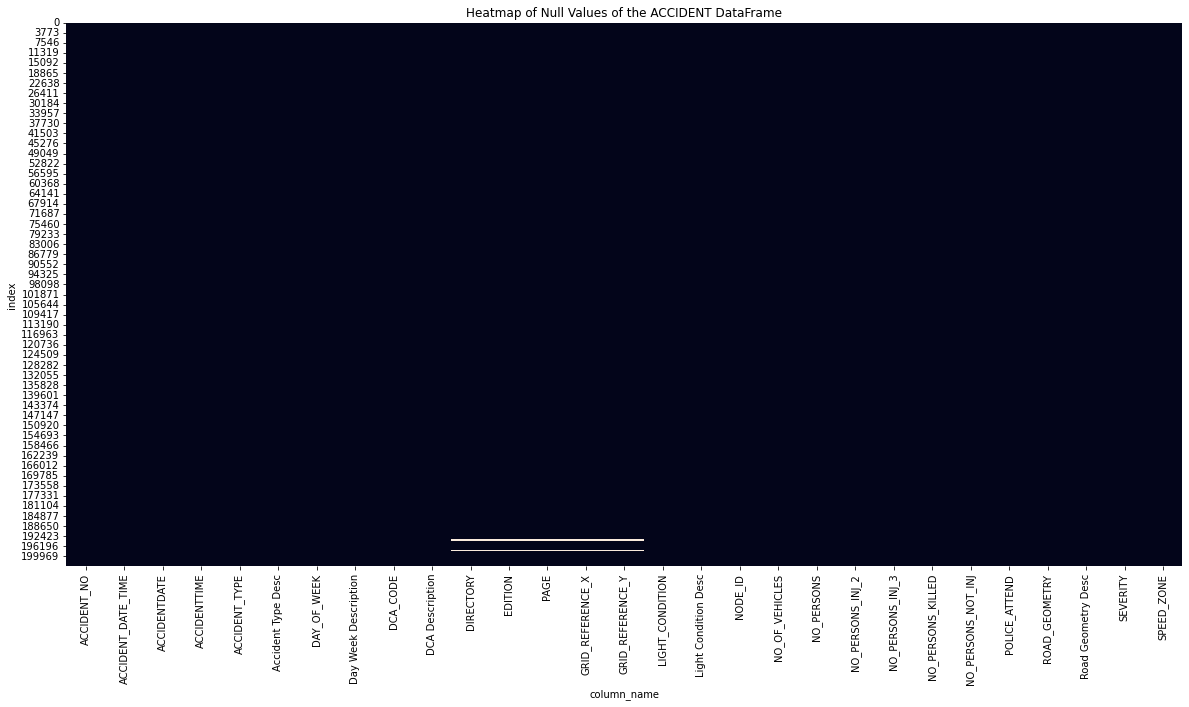

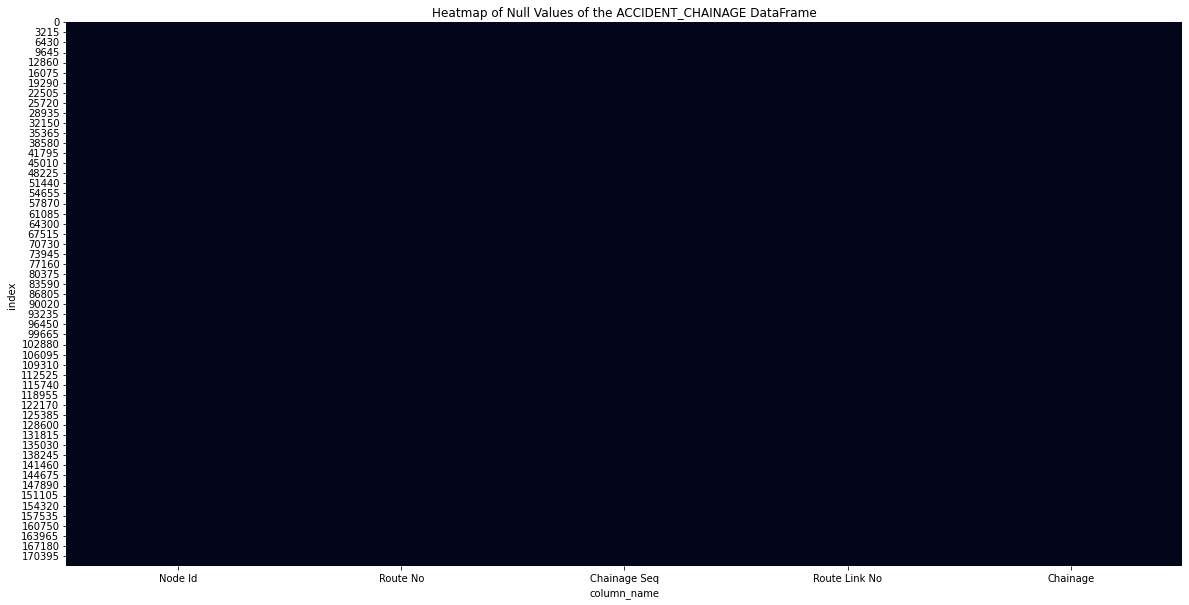

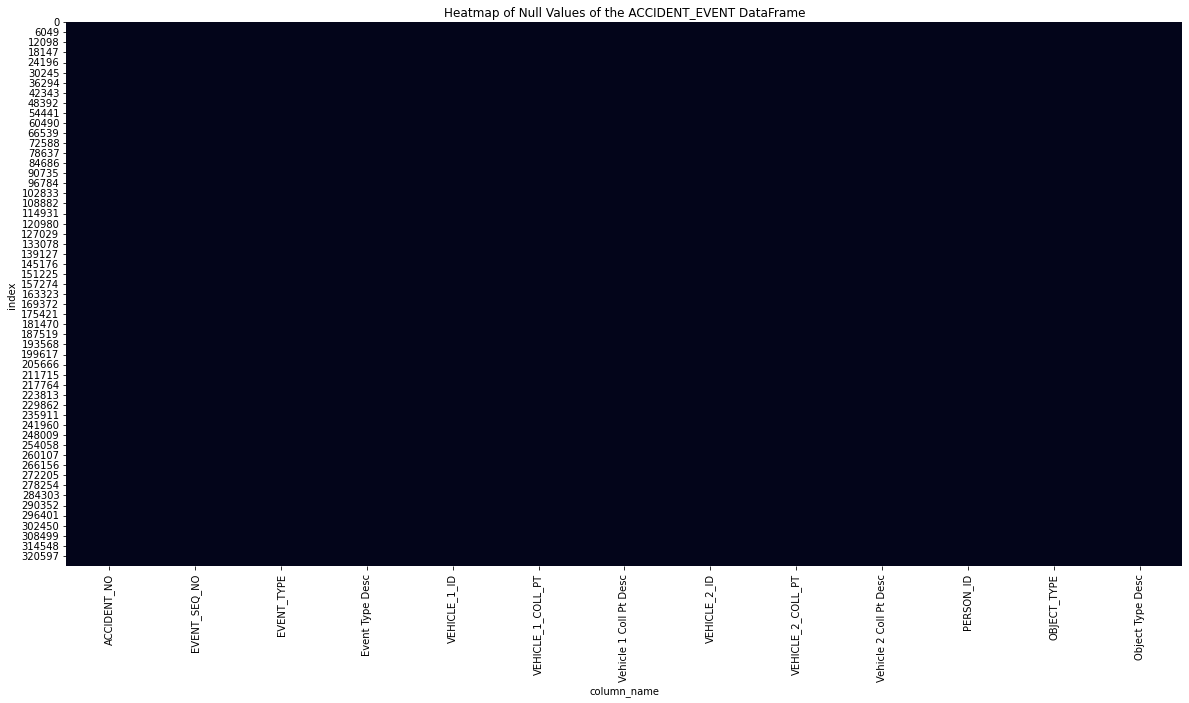

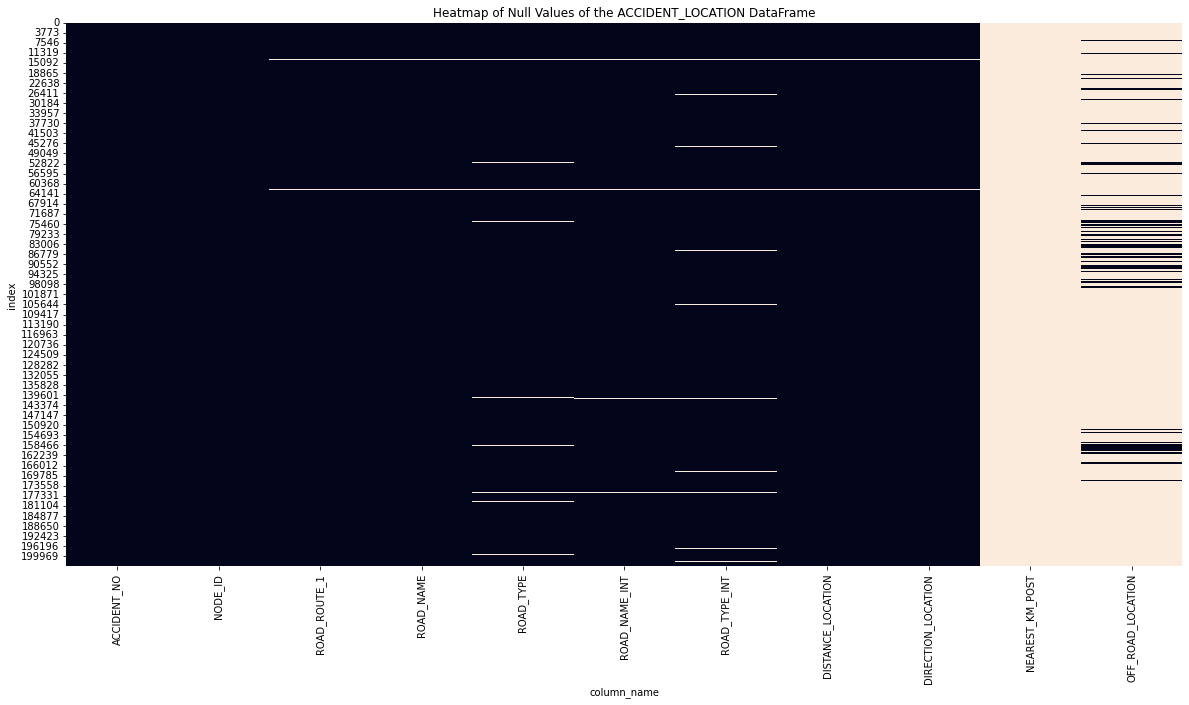

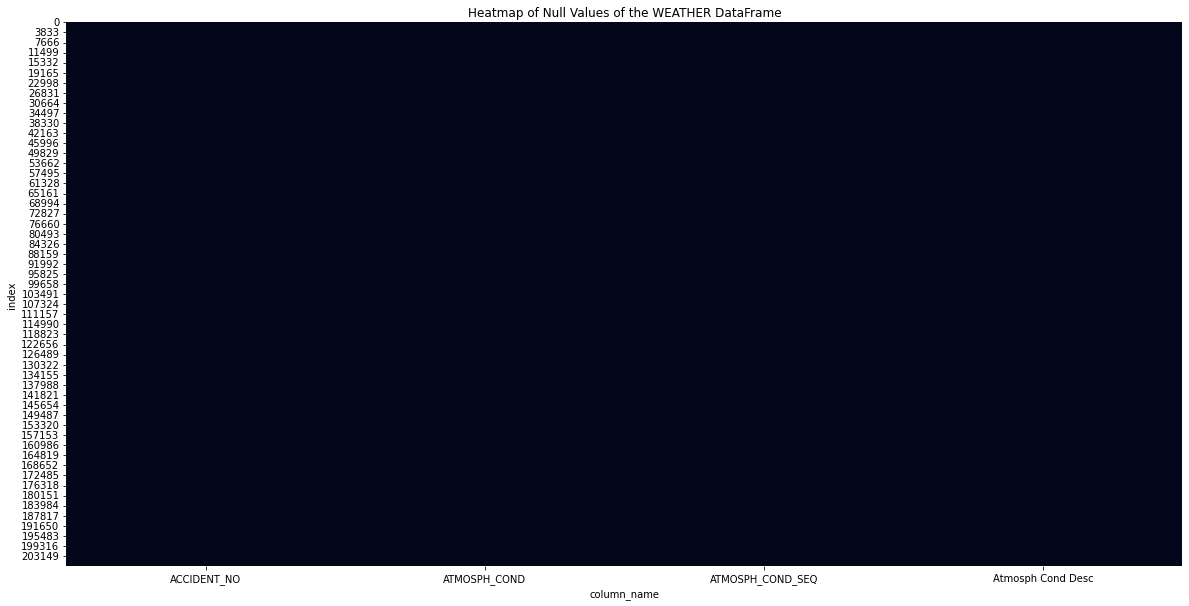

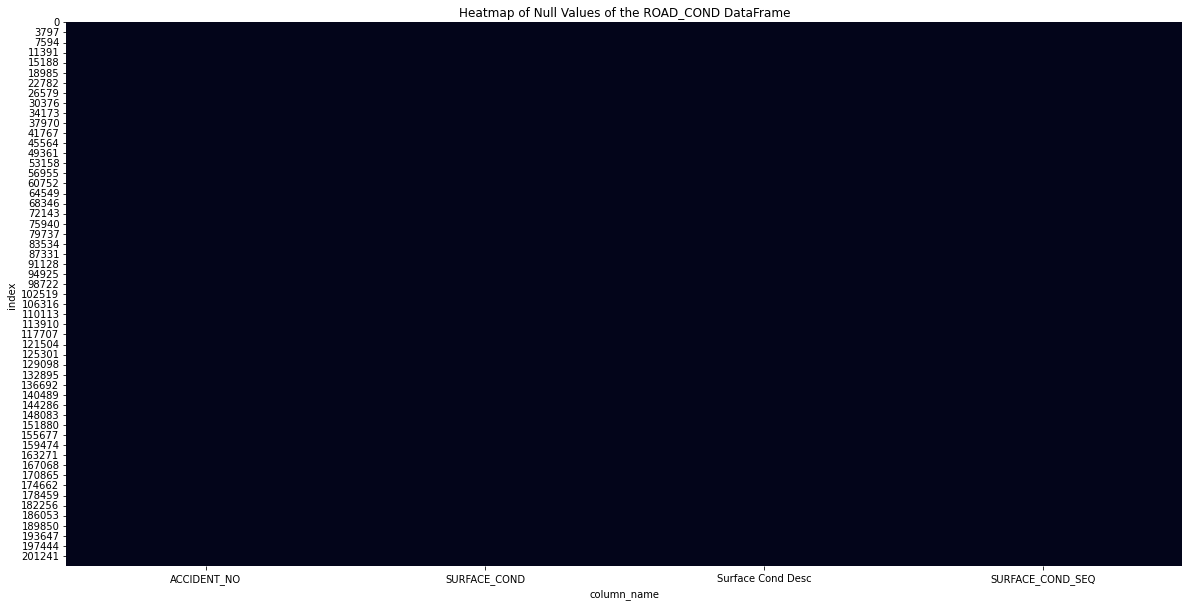

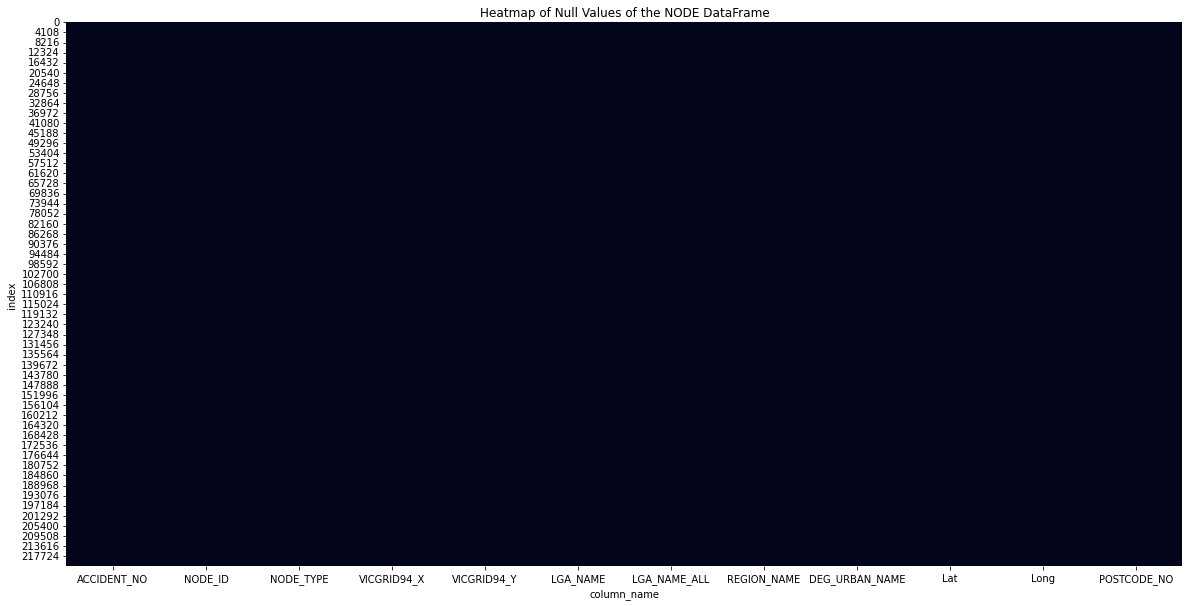

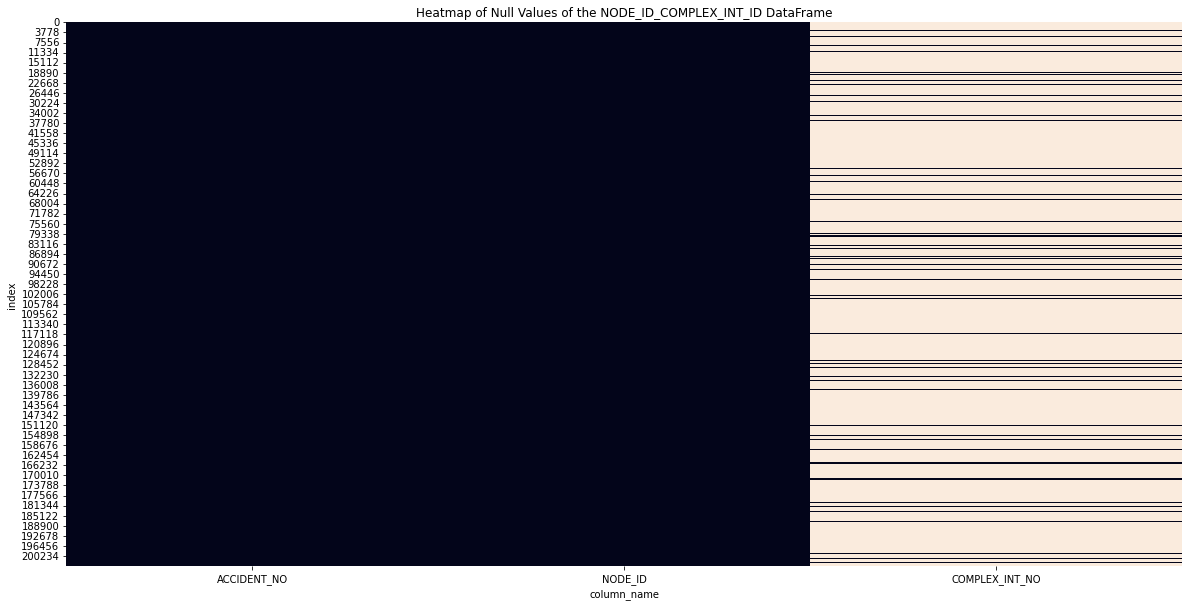

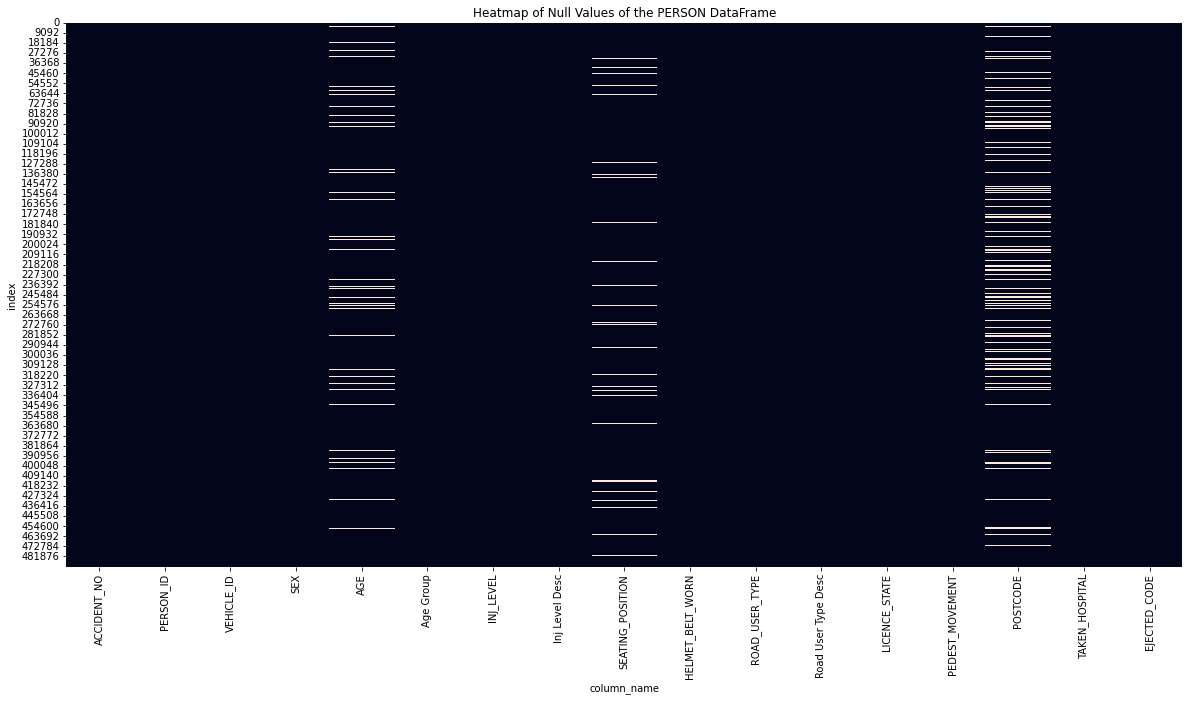

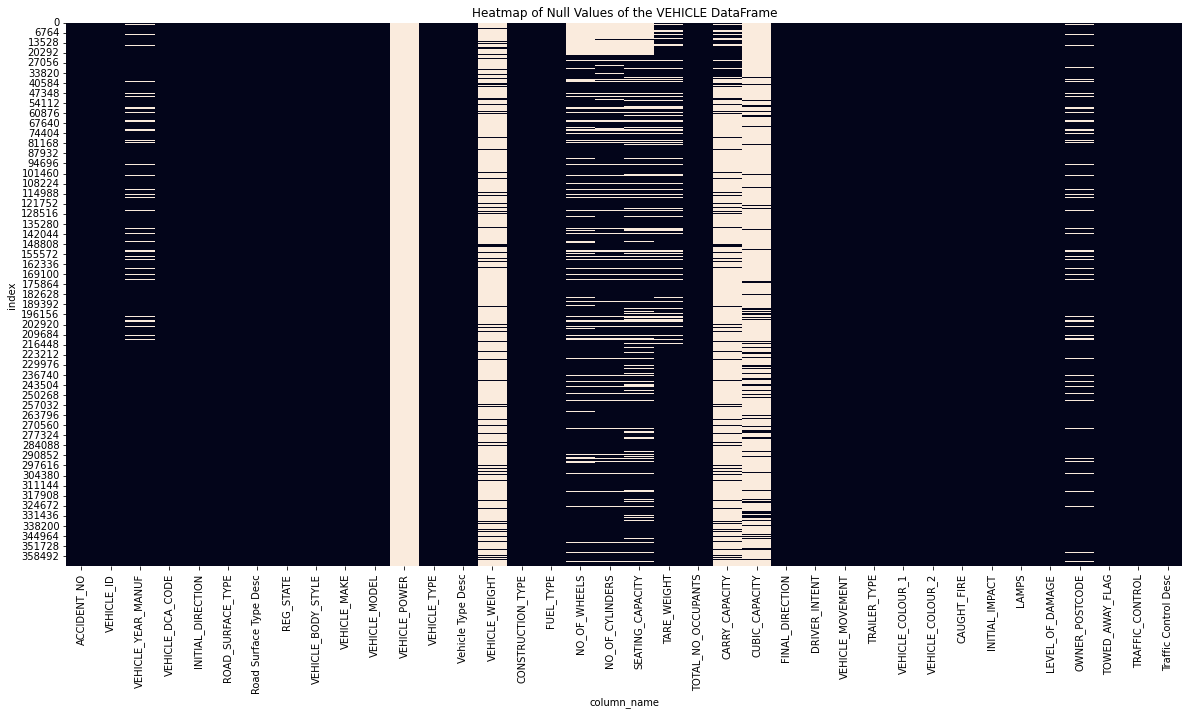

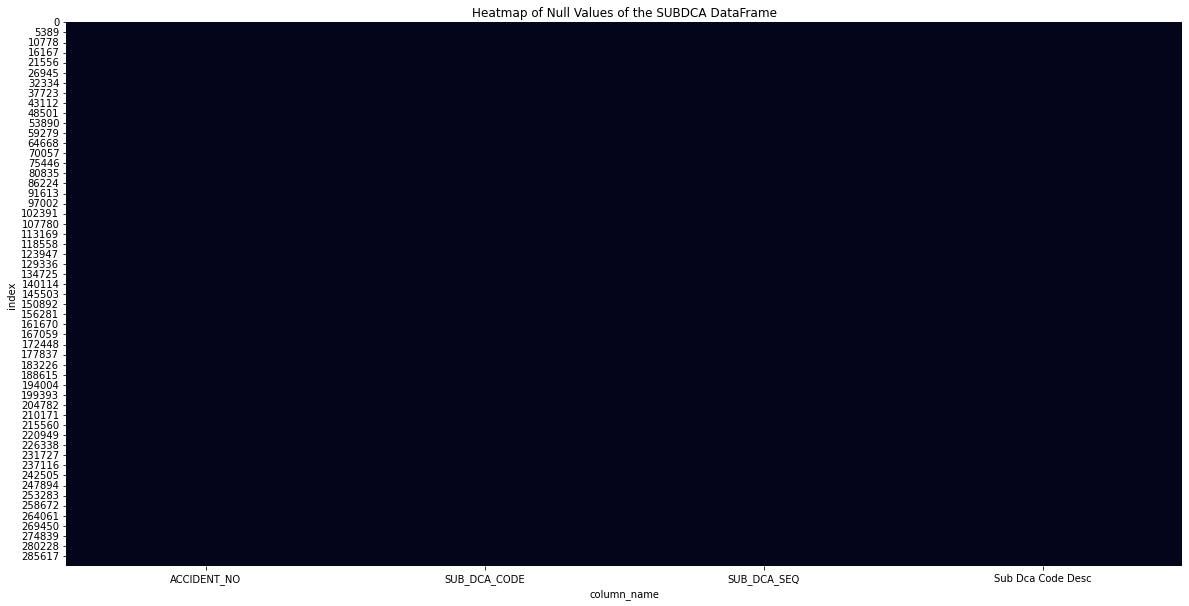

In [10]:
# Display null values

def display_null_val(name, dataframe: pd.DataFrame) -> None:
    plt.figure(figsize=(20,10))
    sns.heatmap(dataframe.isnull(), cbar=False)
    plt.ylabel('index')
    plt.xlabel('column_name')
    plt.title(f'Heatmap of Null Values of the {name} DataFrame')
    plt.show()

for df_name, df in dict_df.items():
    display_null_val(df_name, df)


#### Discussion

- **ACCIDENT:** Really few missing values (we can maybe drop them)
- **ACCIDENT_CHAINAGE and ACCIDENT_EVENT:** No missing values !
- **ACCIDENT_LOCATION:** a lot of missing values for the last 2 columns (we might not take them into considerations)
- **WEATHER, ROAD_COND and NODE:** 0 missing values !
- **PERSON:** Age -> Mean imputation or drop as 0 null values in Age Group, Seating Position -> Hard to impute as it is a string (we will drop it), Postcode -> drop
- **VEHICULES:** Year of Manufacturing -> Median Imputation, Power -> drop, Weight -> drop.
---

## Features that might be interesting

- **ACCIDENT** DataFrame:
    - ACCIDENT_NO: for ML modeling (if we want to do some classification/clusterisation)
    - Date & Time
    - Type
    - Day of the week
    - DCA_CODE
    - conditions (has to be merges with WEATHER DataFrame)
    - NODE_ID: really important feature to see the crash location (has to be merge with the NODE DataFrame)
    - nb of vehicles
    - nb of person
    - nb of person injured (if time left  see of those person went to the hospital thanks to the PERSON DataFrame)
    - nb of person killed
    - Road geometry
    - speed_zone
---
- **PERSON** DataFrame:
    - Sex
    - Age group
    - Seating position
    - Licence State
    - Road user type (with description)
> We will only take the mean age during the crash -> Hard to handle the data
---
- **ROAD_SURFACE_COND** DataFrame:
    - Surface Cond (with Description)
---
- **WEATHER** DataFrame:
    - Atmoshperic Cond (with description)
---
- **VEHICLE** DataFrame:
    - Vehicle year of manufacturing
    - Vehicle type (with description) -> *Hard to handle for each accident*
    - Road surface type (with description)



### Creation of the new dataset

Here we will create a new dataset will all the interesting features for data visualisation.

In [65]:
df_WEATHER.columns

Index(['ACCIDENT_NO', 'ATMOSPH_COND', 'ATMOSPH_COND_SEQ', 'Atmosph Cond Desc'], dtype='object')

In [19]:
display(df_WEATHER.ATMOSPH_COND.unique())
display(df_WEATHER["Atmosph Cond Desc"].unique())

array([1, 9, 5, 7, 2, 6, 4, 3])

array(['Clear', 'Not known', 'Smoke', 'Strong winds', 'Raining', 'Dust',
       'Fog', 'Snowing'], dtype=object)

In [6]:
# Dictionnary for the wanted features

wanted_features = {
   'ACCIDENT': ['ACCIDENT_NO', 'ACCIDENT_DATE_TIME', 'ACCIDENT_TYPE',
       'Accident Type Desc', 'DAY_OF_WEEK', 'Day Week Description', 'DCA_CODE',
       'DCA Description', 'LIGHT_CONDITION', 'Light Condition Desc',
       'NODE_ID', 'NO_OF_VEHICLES', 'NO_PERSONS', 'NO_PERSONS_INJ_2',
       'NO_PERSONS_INJ_3', 'NO_PERSONS_KILLED', 'NO_PERSONS_NOT_INJ',
       'ROAD_GEOMETRY', 'Road Geometry Desc', 'SPEED_ZONE'],
   'ROAD_COND': ['ACCIDENT_NO', 'SURFACE_COND', 'Surface Cond Desc'],
   'WEATHER' : ['ACCIDENT_NO', 'ATMOSPH_COND', 'Atmosph Cond Desc'],
   'VEHICLE': ['ACCIDENT_NO', 'VEHICLE_YEAR_MANUF', 'ROAD_SURFACE_TYPE', 'Road Surface Type Desc',
       'VEHICLE_TYPE', 'Vehicle Type Desc']
}

#### Preprocessing before concatenation

Some DataFrames requires preprocessing (groupby.mean(), remove duplicate) before concatenation.

In [7]:
# Mean age of the crash
mean_age = df_PERSON.groupby('ACCIDENT_NO').mean()

In [8]:
# Mean year of manu and surf type
mean_year_surf = df_VEHICLE.groupby("ACCIDENT_NO").mean().iloc[:,:2].rename(columns={"VEHICLE_YEAR_MANUF": "MEAN_VEHI_YEAR_MANUF"})

# Take only columns that interests us
prepro_mean_age = mean_age.drop("POSTCODE", axis=1).rename(columns={"AGE": "MEAN_AGE"})

# Remove duplicates in the WEATHER DataFrame
weather = df_WEATHER[wanted_features['WEATHER']].set_index("ACCIDENT_NO")
weather = weather.loc[~weather.index.duplicated(keep='first')]

# Remove duplicates in the ROAD_COND DataFrame
road_cond = df_ROAD_COND[wanted_features['ROAD_COND']].set_index("ACCIDENT_NO")
road_cond = road_cond.loc[~road_cond.index.duplicated(keep='first')]

#### Concatenation

In [9]:
new_df = df_ACCIDENT[wanted_features['ACCIDENT']].set_index("ACCIDENT_NO")
new_df

,ACCIDENT_DATE_TIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,LIGHT_CONDITION,Light Condition Desc,NODE_ID,NO_OF_VEHICLES,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,ROAD_GEOMETRY,Road Geometry Desc,SPEED_ZONE
ACCIDENT_NO,,,,,,,,,,,,,,,,,,,
T20060000010,2006-01-13 12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,Day,43078,3,6,0,1,0,5,1,Cross intersection,60
T20060000018,2006-01-13 19:10:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,Day,29720,2,4,0,1,0,3,2,T intersection,70
T20060000022,2006-01-14 12:10:00,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,1,Day,203074,1,2,1,0,0,1,5,Not at intersection,100
T20060000023,2006-01-14 11:49:00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),1,Day,55462,2,2,1,0,0,1,2,T intersection,80
T20060000026,2006-01-14 10:45:00,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,1,Day,202988,2,3,0,3,0,0,5,Not at intersection,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T20200019239,2020-01-11 12:11:00,1,Collision with vehicle,0,Sunday,142,LEAVING PARKING,1,Day,665835,2,4,1,0,0,3,5,Not at intersection,50
T20200019247,2020-01-11 15:30:00,4,Collision with a fixed object,1,Sunday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,1,Day,665912,1,2,2,0,0,0,5,Not at intersection,999
T20200019250,2020-01-11 18:00:00,1,Collision with vehicle,0,Sunday,116,LEFT NEAR (INTERSECTIONS ONLY),1,Day,226603,2,2,1,0,0,1,1,Cross intersection,60


In [10]:
new_df = pd.concat([new_df, prepro_mean_age, mean_year_surf, weather, road_cond], axis=1)
new_df.head()

,ACCIDENT_DATE_TIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,LIGHT_CONDITION,Light Condition Desc,NODE_ID,...,ROAD_GEOMETRY,Road Geometry Desc,SPEED_ZONE,MEAN_AGE,MEAN_VEHI_YEAR_MANUF,ROAD_SURFACE_TYPE,ATMOSPH_COND,Atmosph Cond Desc,SURFACE_COND,Surface Cond Desc
ACCIDENT_NO,,,,,,,,,,,,,,,,,,,,,
T20060000010,2006-01-13 12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,Day,43078,...,1,Cross intersection,60,47.600000,2000.0,1.0,1,Clear,1,Dry
T20060000018,2006-01-13 19:10:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,Day,29720,...,2,T intersection,70,21.500000,1994.5,1.0,1,Clear,1,Dry
T20060000022,2006-01-14 12:10:00,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,1,Day,203074,...,5,Not at intersection,100,47.500000,1995.0,1.0,1,Clear,1,Dry
T20060000023,2006-01-14 11:49:00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),1,Day,55462,...,2,T intersection,80,42.500000,2000.5,1.0,1,Clear,1,Dry
T20060000026,2006-01-14 10:45:00,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,1,Day,202988,...,5,Not at intersection,50,57.666667,1991.0,1.0,1,Clear,1,Dry


In [11]:
new_df.to_csv('data/acc_dataset.csv')